In [56]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('../../csv/nyc_all_parks_filtered.csv')

Import all libraries need and csv file

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18802 entries, 0 to 18801
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            18802 non-null  object 
 1   borough         18802 non-null  object 
 2   location        18802 non-null  object 
 3   event_type      11763 non-null  object 
 4   category        18778 non-null  object 
 5   attendance      18656 non-null  float64
 6   audience        11763 non-null  object 
 7   classification  15679 non-null  object 
 8   time            18802 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [58]:
df.columns

Index(['date', 'borough', 'location', 'event_type', 'category', 'attendance',
       'audience', 'classification', 'time'],
      dtype='object')

In [59]:
df.head()

,date,borough,location,event_type,category,attendance,audience,classification,time
0,2002-06-25,Manhattan,Constance Baker Motley Recreation Center,Community Based Event,Arts/Culture,22.0,"Children, Young Adult, Adults, Teens, Seniors,...",NaN,17:00:00
1,2002-06-25,Manhattan,Pelham Fritz Recreation Center,Local Event,Arts/Culture,55.0,"Children, Young Adult, Adults, Teens, Adaptive...",NaN,16:30:00
2,2002-06-29,Manhattan,White Park,Local Event,Mobile Unit,200.0,"Children, Young Adult, Adults, Teens, Adaptive...",NaN,00:30:00
3,2002-06-30,Manhattan,Bloomingdale Playground,Local Event,Mobile Unit,125.0,"Tot, Young Adult, Children, Adults, Teens, Ada...",NaN,00:30:00
4,2002-07-02,Manhattan,Abraham Lincoln Playground,Local Event,Mobile Unit,105.0,"Young Adult, Adults, Teens, Adaptive, General ...",NaN,00:30:00


In [60]:
df.nunique()


date              1815
borough              5
location          1112
event_type           5
category            13
attendance         541
audience           721
classification      35
time               600
dtype: int64

In [61]:
df['event_type'].unique()

array(['Community Based Event', 'Local Event', 'Tournament/Competition',
       'Open House', 'Agency Produced Event', nan], dtype=object)

In [62]:
df['location'].unique()

array(['Constance Baker Motley Recreation Center',
       'Pelham Fritz Recreation Center', 'White Park', ...,
       'CUNY City College of New York',
       'Columbia University - Jerome L. Greene Science Center',
       'Frederick Douglass Academy VI High School'], dtype=object)

In [63]:
df.isna().sum()

date                 0
borough              0
location             0
event_type        7039
category            24
attendance         146
audience          7039
classification    3123
time                 0
dtype: int64

In [64]:
df = df[df.attendance.notnull()]


Removing all empty attendance rows since Attendance is what we are measuring.

In [65]:
df.isna().sum()

date                 0
borough              0
location             0
event_type        6907
category            24
attendance           0
audience          6907
classification    3115
time                 0
dtype: int64

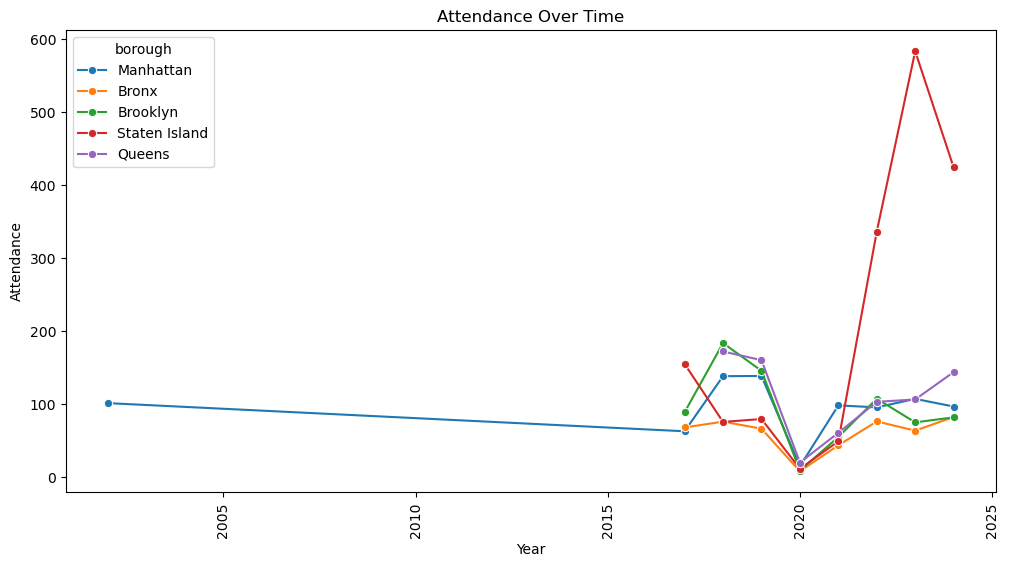

In [66]:
df["date"] = pd.to_datetime(df["date"])  # Convert to datetime format
df["year"] = df["date"].dt.year # Extract YYYY-MM

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="year", y="attendance", errorbar=None, marker="o", linestyle="-",hue='borough')

# Title and labels
plt.title("Attendance Over Time")
plt.xlabel("Year")
plt.ylabel("Attendance")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show plot
plt.show()

Text(0, 0.5, 'Total Attendance')

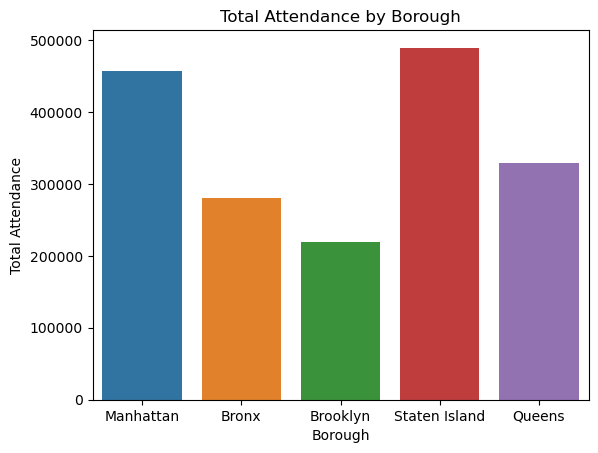

In [67]:
sns.barplot(df,x='borough',y='attendance',estimator="sum", errorbar=None, hue ='borough')
plt.title("Total Attendance by Borough")
plt.xlabel("Borough")
plt.ylabel("Total Attendance")


Staten Island seems to be the leading borough in total attendance. But this might be due to high event frequency.

Text(0, 0.5, 'Total Event Counts')

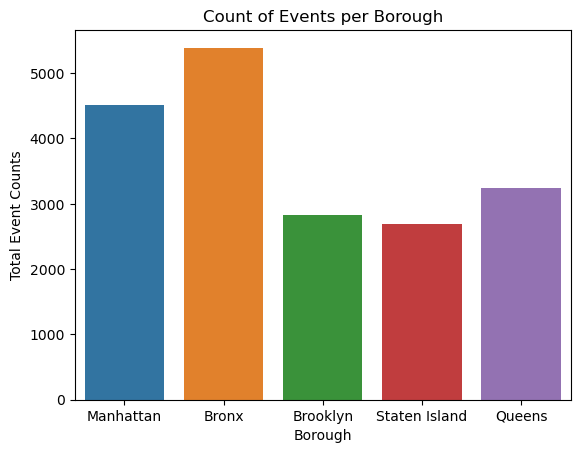

In [68]:
sns.countplot(data=df, x="borough",hue ='borough')
plt.title("Count of Events per Borough")
plt.xlabel("Borough")
plt.ylabel("Total Event Counts")


Looking at event counts per borough, we can see that Staten Island has the lowest frequency but yet the highest total attendance. Will need to dive deeper to figure out why. 

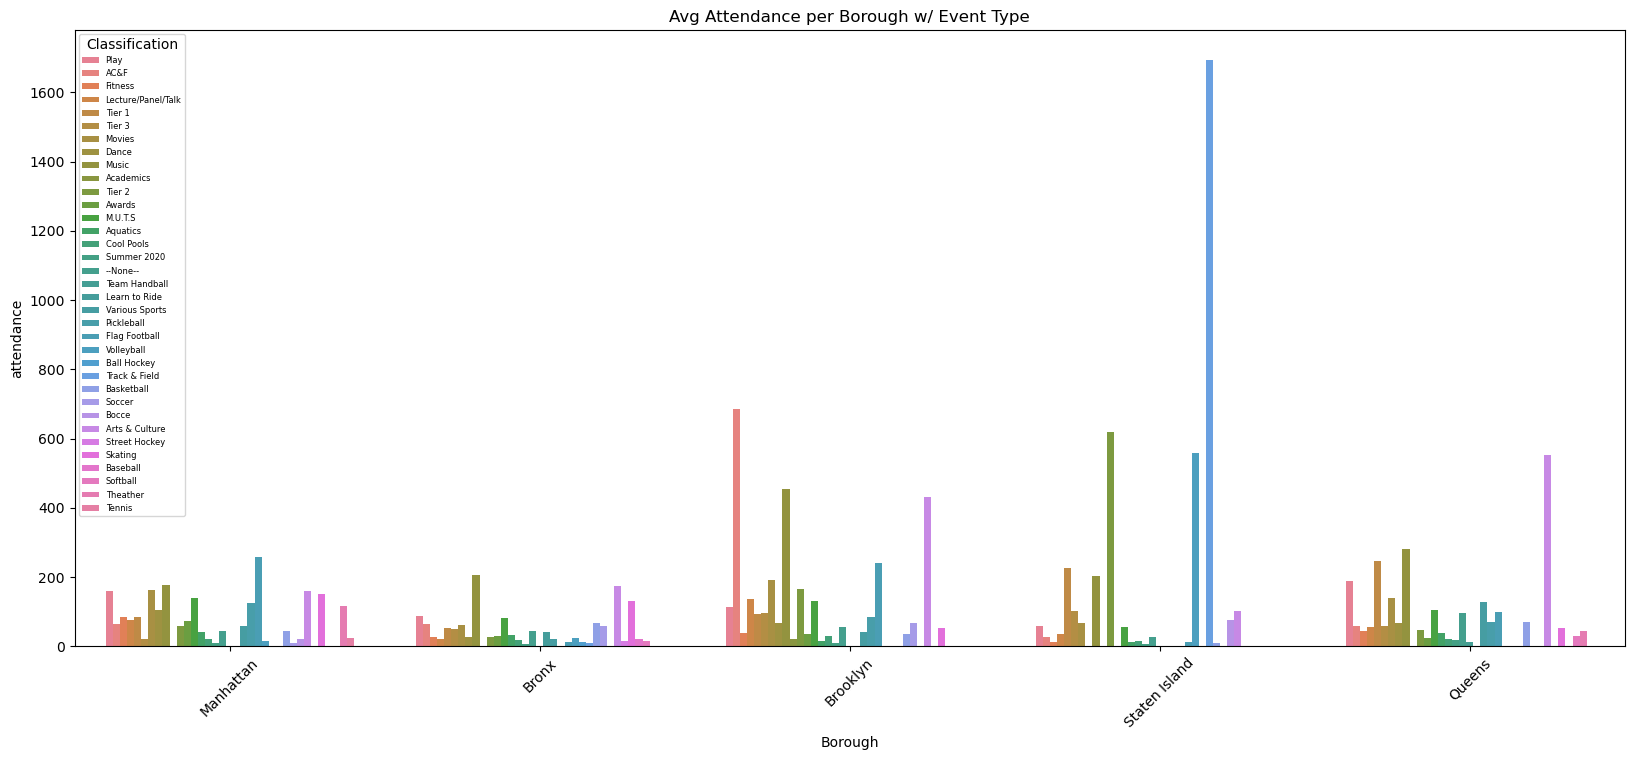

In [80]:
plt.figure(figsize=(20, 8))
sns.barplot(data=df, x='borough' , y = 'attendance', hue = 'classification', estimator= 'mean',errorbar=None)
plt.title('Avg Attendance per Borough w/ Event Type')
plt.xlabel('Borough')
plt.ylabel('attendance')
plt.xticks(rotation=45)

plt.legend(title="Classification", fontsize=6)  # Reduce text size
plt.show()

Shows a very big outlier in Staten Island Track and Field.

In [ ]:
df_SI= df[df["borough"] == "Staten Island"]

df_SI["date"] = pd.to_datetime(df_SI["date"])  # Convert to datetime format
df_SI["year_month"] = df_SI["date"].dt.to_period("M").astype(str)  # Extract YYYY-MM


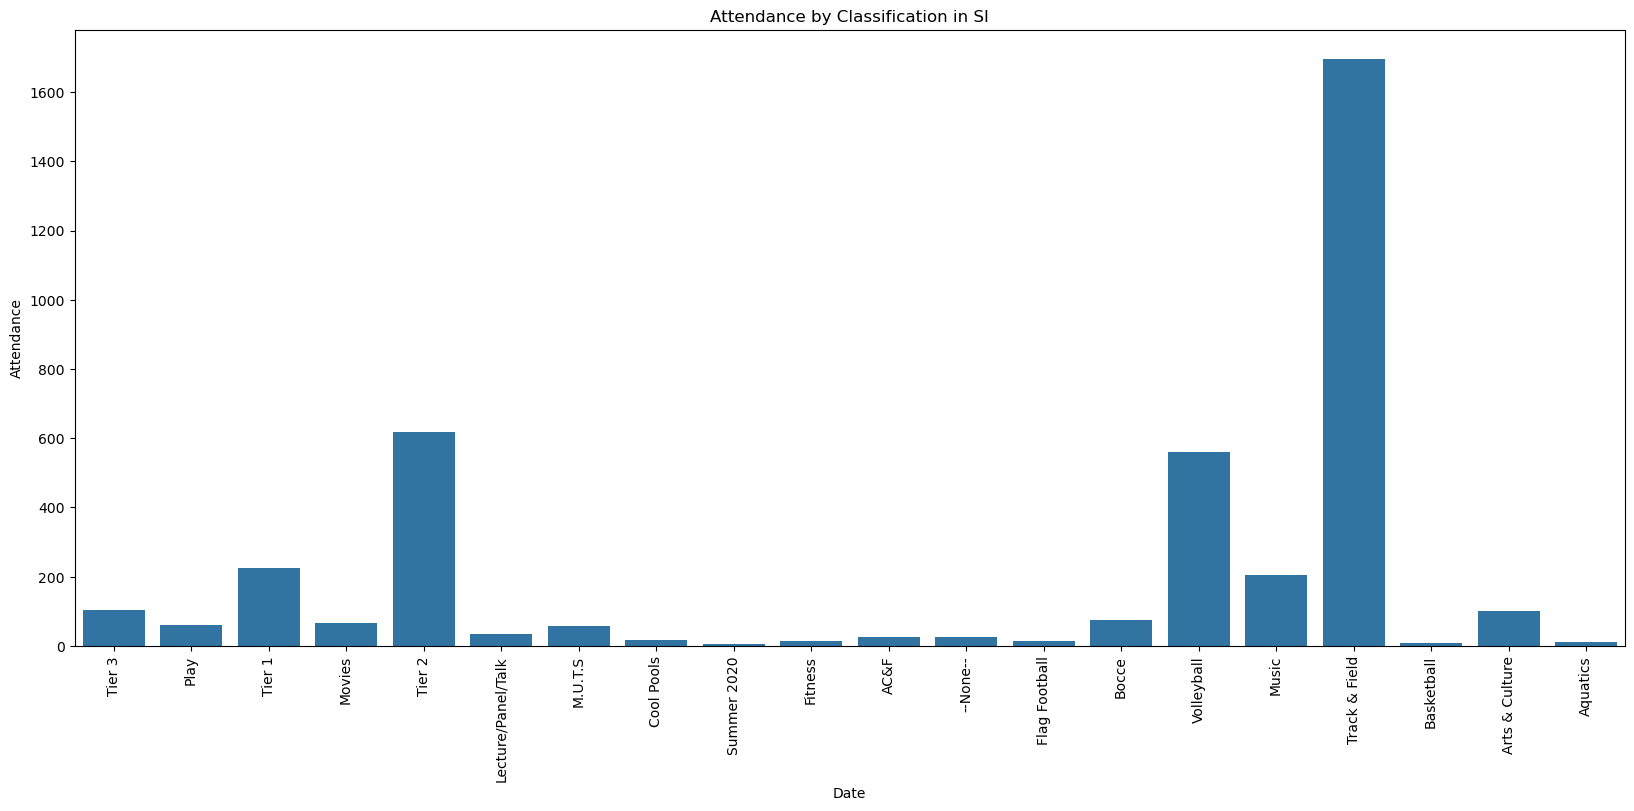

In [78]:
plt.figure(figsize=(20, 8))
sns.barplot(data=df_SI, x='classification' , y = 'attendance', estimator= 'mean', errorbar=None)

# Title and labels
plt.title("Attendance by Classification in SI")
plt.xlabel("Date")
plt.ylabel("Attendance")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show plot
plt.show()

Confirmation that it is Track and Field that produced the giant spike in attendance. 

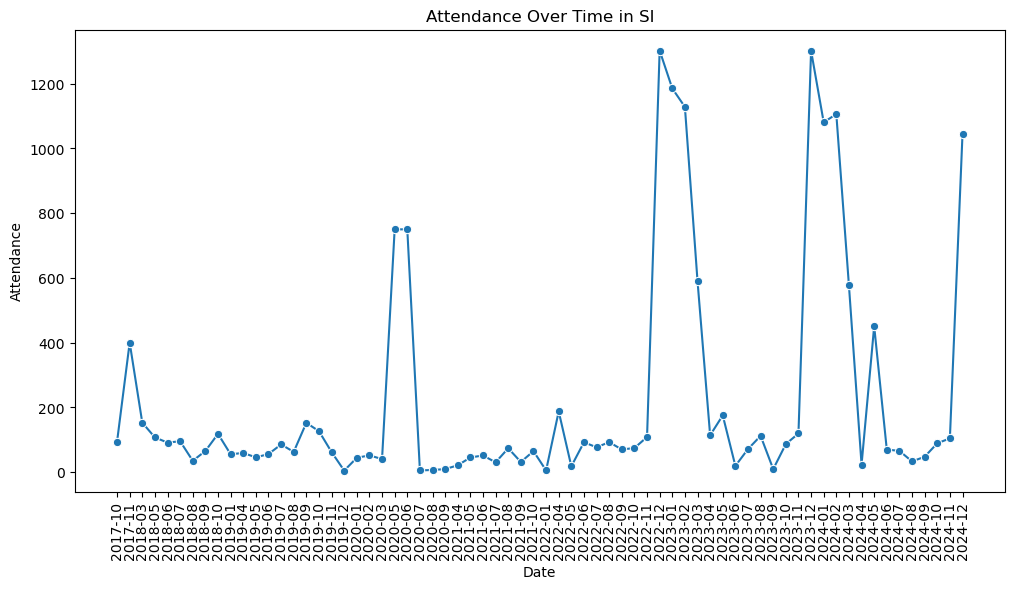

In [72]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_SI, x="year_month", y="attendance", errorbar=None, marker="o", linestyle="-")

# Title and labels
plt.title("Attendance Over Time in SI")
plt.xlabel("Date")
plt.ylabel("Attendance")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show plot
plt.show()

Huge Spike in winter of 2022 and winter of 2023. 

Maybe there is a special annual event near end of year.

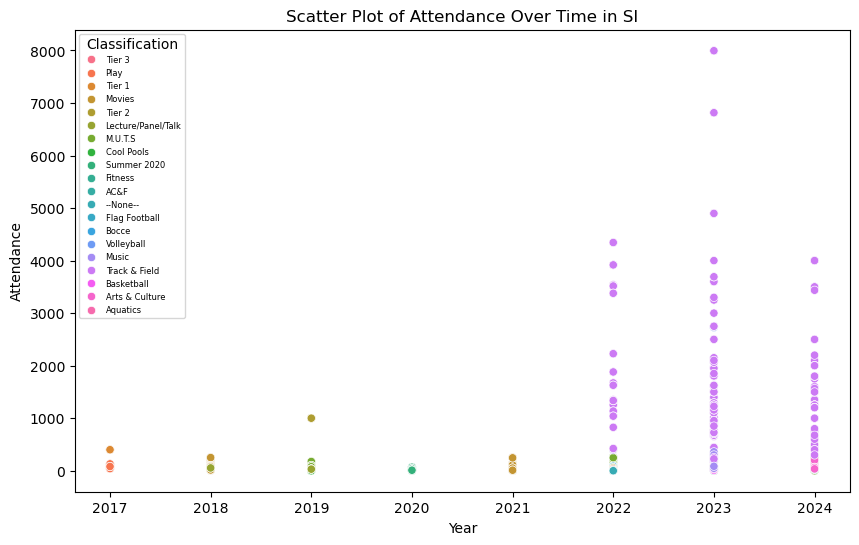

In [73]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_SI, x="year", y="attendance",hue='classification')

# Title and labels
plt.title("Scatter Plot of Attendance Over Time in SI")
plt.xlabel("Year")
plt.ylabel("Attendance")


plt.legend(title="Classification", fontsize=6)  # Reduce text size

# Show the plot
plt.show()



This Scatter plot for SI shows outliers but the obvious ones are at 2019, 2022, 2023, and 2024. I want to see exactly what event that is causing such high variance.

In [76]:


# Sort the DataFrame by attendance in descending order
df_sorted_SI = df_SI.sort_values(by="attendance", ascending=False)

# Display the top rows
df_sorted_SI.head(20)  # Show the top 10 highest attendance rows




,date,borough,location,event_type,category,attendance,audience,classification,time,year,year_month
13842,2023-01-07,Staten Island,Ocean Breeze Athletic Complex,NaN,Sport,7995.0,NaN,Track & Field,08:00:00,2023,2023-01
13828,2023-01-07,Staten Island,Ocean Breeze Athletic Complex,NaN,Sport,7995.0,NaN,Track & Field,08:00:00,2023,2023-01
14060,2023-02-04,Staten Island,Ocean Breeze Athletic Complex,NaN,Sport,6815.0,NaN,Track & Field,08:30:00,2023,2023-02
14045,2023-02-04,Staten Island,Ocean Breeze Athletic Complex,NaN,Sport,6815.0,NaN,Track & Field,08:30:00,2023,2023-02
17299,2024-05-22,Staten Island,SIUH Community Park,Community Based Event,Nature,5000.0,"Tot, Children, Young Adult, Adults, Teens, Gen...",NaN,12:30:00,2024,2024-05
14069,2023-02-05,Staten Island,Ocean Breeze Athletic Complex,NaN,Sport,4898.0,NaN,Track & Field,08:30:00,2023,2023-02
14068,2023-02-05,Staten Island,Ocean Breeze Athletic Complex,NaN,Sport,4898.0,NaN,Track & Field,08:30:00,2023,2023-02
14916,2023-05-25,Staten Island,Staten Island University Hospital Community Park,Local Event,Nature,4500.0,General Public,NaN,13:00:00,2023,2023-05
13773,2022-12-27,Staten Island,Ocean Breeze Athletic Complex,NaN,Sport,4344.0,NaN,Track & Field,09:00:00,2022,2022-12
13774,2022-12-27,Staten Island,Ocean Breeze Athletic Complex,NaN,Sport,4344.0,NaN,Track & Field,09:00:00,2022,2022-12
